# Modeling: Regression
- Use n-1 year on-field stats and n year for talent stats to predict year n results
- Treat data as set of features at start of each year and try to regress on various outcomes

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid") 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv('data/working_df.csv')
df.head(20)

,team,team_id,year,conference,games_played,expected_wins,wins,losses,win_pct,prev_win_pct,...,usages,off_drives,def_drives,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate,coach
0,Air Force,2005,2014,Mountain West,13,9.7,10,3,0.769231,0.166667,...,0.684,139,137,0.860561,0.902638,0.096601,0.214295,0.439644,0.518913,Troy Calhoun
1,Air Force,2005,2015,Mountain West,14,8.2,8,6,0.571429,0.769231,...,0.646,165,161,1.089935,1.425767,0.207059,0.138795,0.451837,0.375831,Troy Calhoun
2,Air Force,2005,2016,Mountain West,13,9.4,10,3,0.769231,0.571429,...,0.625,177,173,1.154045,1.549206,0.272449,0.172654,0.474216,0.357631,Troy Calhoun
3,Air Force,2005,2017,Mountain West,12,4.4,5,7,0.416667,0.769231,...,0.556,147,148,1.027586,1.534094,0.227697,0.158770,0.483333,0.366048,Troy Calhoun
4,Air Force,2005,2018,Mountain West,12,6.4,5,7,0.416667,0.416667,...,0.720,138,139,1.095699,1.374592,0.235542,0.247661,0.488398,0.422096,Troy Calhoun
5,Air Force,2005,2019,Mountain West,13,10.9,11,2,0.846154,0.416667,...,0.581,139,140,1.122577,1.443571,0.223775,0.184820,0.464612,0.397790,Troy Calhoun
6,Air Force,2005,2020,Mountain West,6,4.7,3,3,0.500000,0.846154,...,0.000,132,128,1.044755,1.214711,0.318319,0.124542,0.531144,0.407162,Troy Calhoun
7,Air Force,2005,2021,Mountain West,13,9.1,10,3,0.769231,0.500000,...,0.724,58,59,1.058453,1.133019,0.331945,0.122461,0.535326,0.439776,Troy Calhoun
8,Air Force,2005,2022,Mountain West,13,9.9,10,3,0.769231,0.769231,...,0.852,129,124,1.184024,1.408220,0.280818,0.178030,0.456805,0.376312,Troy Calhoun
9,Air Force,2005,2023,Mountain West,13,10.7,9,4,0.692308,0.769231,...,0.263,120,115,1.132888,1.187304,0.297878,0.123016,0.480570,0.402377,Troy Calhoun


In [19]:
df.columns

Index(['team', 'team_id', 'year', 'conference', 'games_played',
       'expected_wins', 'wins', 'losses', 'win_pct', 'prev_win_pct', 'elo',
       'fpi', 'conference_rating', 'recruiting_rank', 'recruiting_rating',
       'blue_chip', 'blue_chip_ratio', 'passing_usage', 'rushing_usage',
       'usages', 'off_drives', 'def_drives', 'off_explode', 'def_explode',
       'off_ppa', 'def_ppa', 'off_success_rate', 'def_success_rate', 'coach'],
      dtype='object')

In [3]:
df.describe()

,team_id,year,games_played,expected_wins,wins,losses,win_pct,prev_win_pct,elo,fpi,...,rushing_usage,usages,off_drives,def_drives,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,869.617156,2018.509134,12.311358,6.399523,6.494837,5.816521,0.516151,0.518146,1510.760921,1.257963,...,0.628180,0.603681,153.554408,153.768864,1.216561,1.216705,0.173532,0.159508,0.429801,0.422665
std,1046.940284,2.759957,1.665117,2.797228,3.116538,2.512705,0.218896,0.220103,290.132228,12.332011,...,0.238977,0.206515,25.361598,25.795326,0.121024,0.123741,0.093747,0.089173,0.043752,0.042352
min,2.000000,2014.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,683.000000,-35.770000,...,0.000000,0.000000,22.000000,23.000000,0.781381,0.803376,-0.101856,-0.097444,0.263889,0.291351
25%,113.000000,2016.000000,12.000000,4.200000,4.000000,4.000000,0.333333,0.333333,1315.500000,-7.736500,...,0.441000,0.449000,145.000000,145.000000,1.152986,1.154174,0.112579,0.095217,0.399340,0.393285
50%,245.000000,2019.000000,13.000000,6.400000,7.000000,6.000000,0.538462,0.538462,1519.000000,1.510000,...,0.652000,0.618000,157.000000,157.000000,1.234046,1.225369,0.171839,0.158757,0.431743,0.422378
75%,2165.500000,2021.000000,13.000000,8.400000,9.000000,7.000000,0.692308,0.692308,1706.500000,9.515500,...,0.827500,0.771500,168.000000,169.000000,1.295674,1.292848,0.235234,0.218262,0.456970,0.453100
max,2751.000000,2023.000000,15.000000,14.600000,15.000000,12.000000,1.000000,1.000000,2398.000000,35.907000,...,1.000000,1.000000,210.000000,212.000000,1.631986,1.590712,0.495547,0.516594,0.563270,0.555425


In [25]:
features = ['games_played', 'win_pct', 'prev_win_pct', 'elo',
       'fpi', 'conference_rating', 'recruiting_rank', 'recruiting_rating',
            'blue_chip_ratio', 'passing_usage', 'rushing_usage',
       'usages', 'off_drives', 'def_drives', 'off_explode', 'def_explode',
       'off_ppa', 'def_ppa', 'off_success_rate', 'def_success_rate']

corr_df = df[features].corr().win_pct.sort_values(ascending = False)[1:8]
corr_df

elo                  0.564849
fpi                  0.523308
prev_win_pct         0.520703
off_success_rate     0.431678
off_ppa              0.407330
games_played         0.385284
recruiting_rating    0.355091
Name: win_pct, dtype: float64

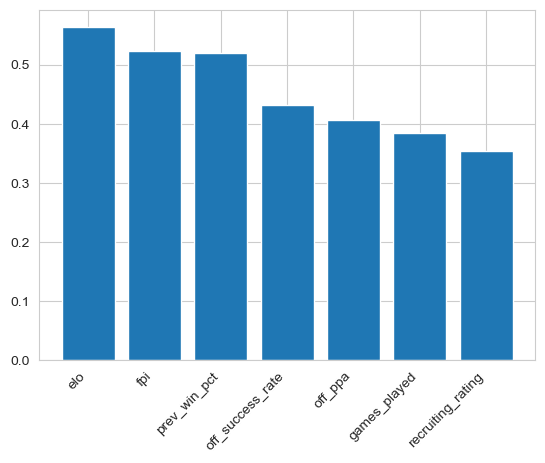

In [42]:
fig, ax = plt.subplots()
plt.bar(corr_df.index, corr_df)

# Rotate 45 degrees 
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

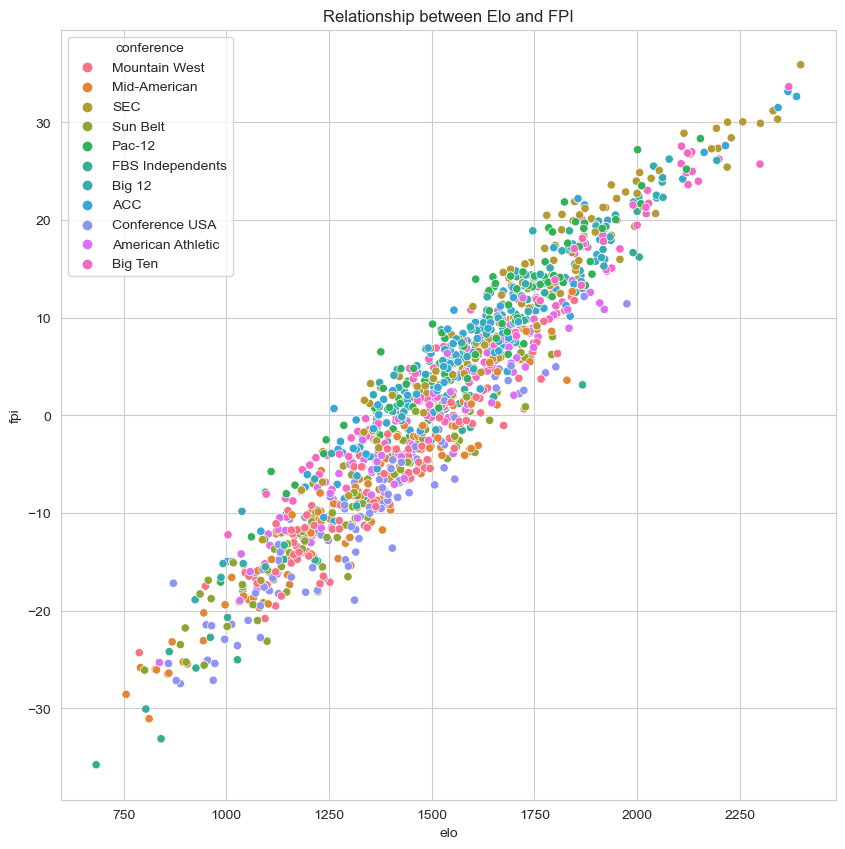

In [46]:
plt.figure(figsize = (10, 10))
sns.scatterplot(df, 
            x = 'elo', 
           y = 'fpi', 
               hue = 'conference')
plt.title("Relationship between Elo and FPI")
plt.show()

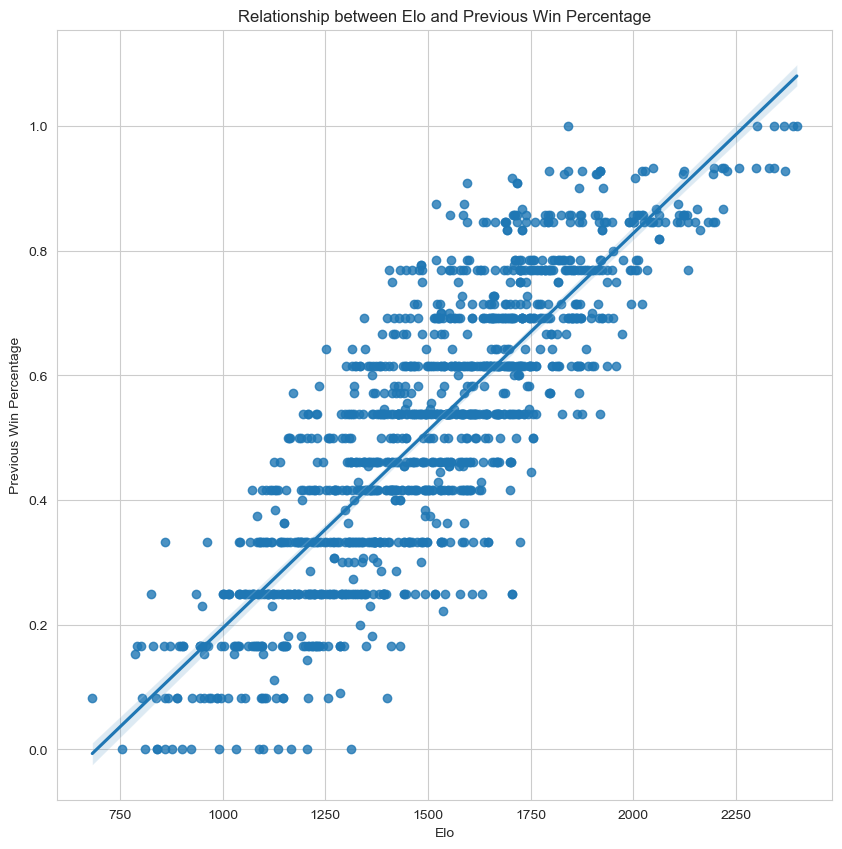

In [50]:
plt.figure(figsize = (10, 10))
sns.regplot(x = df.elo, y = df.prev_win_pct)
plt.title("Relationship between Elo and Previous Win Percentage")
plt.xlabel("Elo")
plt.ylabel("Previous Win Percentage")
plt.show()

In [51]:
df[['elo', 'prev_win_pct']].corr()

,elo,prev_win_pct
elo,1.00000,0.83544
prev_win_pct,0.83544,1.00000


#### Split Training/Testing Sets
- We'll split by hand so we can do things in temporal order just to be safe
- 2014 - 2023 is 10 years of data so we'll take 2014 to 2021 for trainig

In [52]:
split_year = 2022
df_train = df[df.year <= split_year]
df_test = df[df.year > split_year]

- Can't include coach_win_pct when doing regression

In [53]:
# Grab features you want
X_cols = ['elo', 'fpi', 'prev_win_pct', 'conference_rating', 'recruiting_rank', 'recruiting_rating', 
        'blue_chip_ratio', 'usages', 'off_ppa', 'off_success_rate', 'passing_usage']
# Grab the target. Be careful as y_train needs to be a Pandas series or 1D numpy array
y_cols = 'win_pct'

X_train, X_test = df_train[X_cols], df_test[X_cols]
y_train, y_test = df_train[y_cols], df_test[y_cols]

#### Feature Selection

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Let's setup a pipeline to scale our features

In [55]:
y_pred = lr.predict(X_test)

In [60]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

0.1596409400432813

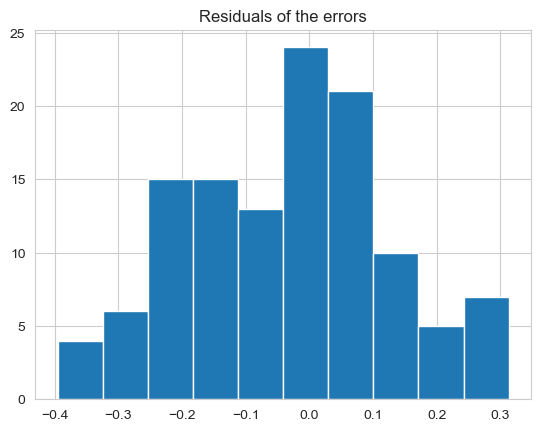

In [69]:
residuals = y_pred - y_test
plt.hist(residuals)
plt.title("Residuals of the errors")
plt.show()

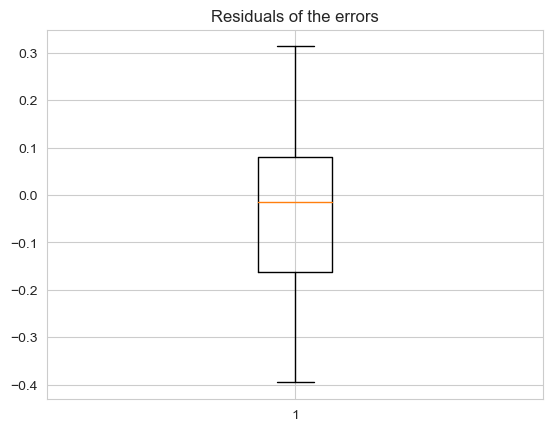

In [71]:
plt.boxplot(residuals)
plt.title("Residuals of the errors")
plt.show()

Compared to the baseline model of

In [64]:
y_pred_base = X_test['prev_win_pct']
base_error = np.sqrt(mean_squared_error(y_test, y_pred_base))
base_error

0.19024357773195852

In [66]:
100*(base_error-error)/base_error

16.086029317528105

So we see an improvement over the baseline, but not by much. About a 10.6% improvement over the baseline.

In [134]:
def percent_diff(a, b):
    return np.abs((a - b) / ((a + b) / 2)) * 100

percent_diff(np.sqrt(mean_squared_error(np.round(y_test*12,0), np.round(y_pred*12, 0))),
np.sqrt(mean_squared_error(np.round(y_test*12,0), np.round(y_pred_base*12, 0))))

10.643495510316251

In [104]:
def model_performance(year, data, model):
    df = data 
    split_year = year
    df_train = df[df.year < split_year]
    df_test = df[df.year == year]
    X_cols = ['elo', 'fpi', 'prev_win_pct', 'conference_rating', 'recruiting_rank', 'recruiting_rating', 
        'blue_chip_ratio', 'usages', 'off_ppa', 'off_success_rate', 'passing_usage']
# Grab the target. Be careful as y_train needs to be a Pandas series or 1D numpy array
    y_cols = 'win_pct'

    X_train, X_test = df_train[X_cols], df_test[X_cols]
    y_train, y_test = df_train[y_cols], df_test[y_cols]
    
    #Fit a linear model 
    lr = model
    lr.fit(X_train, y_train)
    
    # Make predictions
    y_pred = lr.predict(X_test)
    lr_error = np.sqrt(mean_squared_error(y_test, y_pred))

    
    # Baseline model 
    y_pred_base = X_test['prev_win_pct']
    base_error = np.sqrt(mean_squared_error(y_test, y_pred_base))
    
    
    #Compare performance
    
    return 100*(base_error-lr_error)/base_error
    
    
    

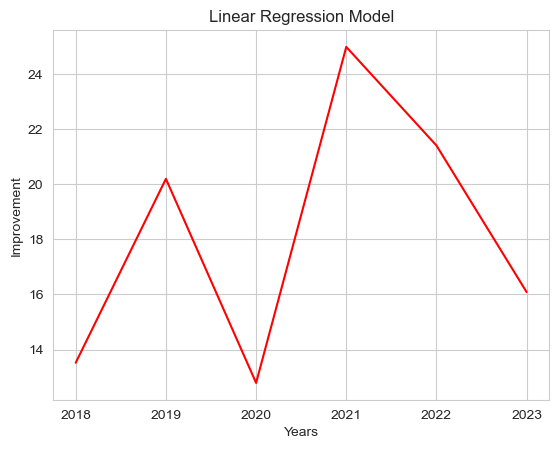

In [116]:
years = [2018, 2019, 2020, 2021, 2022, 2023]
model = LinearRegression()
performances = [model_performance(year, df, model) for year in years]
plt.plot(years,  performances, color = 'red')
plt.xticks(years)
plt.xlabel("Years")
plt.ylabel("Improvement")
plt.title("Linear Regression Model")
plt.show()

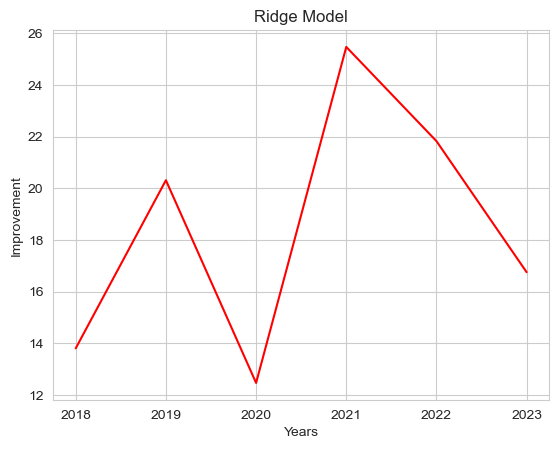

In [115]:
years = [2018, 2019, 2020, 2021, 2022, 2023]
model = Ridge(alpha = 2)
performances = [model_performance(year, df, model) for year in years]
plt.plot(years,  performances, color = 'red')
plt.xticks(years)
plt.xlabel("Years")
plt.ylabel("Improvement")
plt.title("Ridge Model")
plt.show()

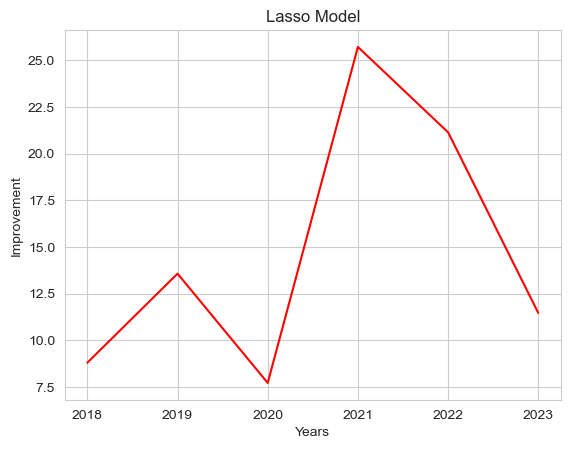

In [118]:
years = [2018, 2019, 2020, 2021, 2022, 2023]
model = Lasso()
performances = [model_performance(year, df, model) for year in years]
plt.plot(years,  performances, color = 'red')
plt.xticks(years)
plt.xlabel("Years")
plt.ylabel("Improvement")
plt.title("Lasso Model")
plt.show()